In [1]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

pd.set_option('display.max_columns', None)


df = pd.read_csv('emoji_sentiment_tweets.csv.gz', compression='gzip')

df

,TIME POSTED,RETWEET,emoji,score,😭,❤️,😅,💪,😁,🇺🇦,👏,🙄,🥵,🔥,🌶,😂,👍,🙏,😘,😍,🤣,😉,🔴,🤔,💕,☺️,©,🎉,😊,🤩,💫,😻,💙,🍑,🇵🇹,💖,♥️,🙏🏽,💯,😆,👀,😜,😏
0,"October 13, 2020 21:08:51",happening tooooo long it's worse fellow Afric...,[],-0.005328,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"October 13, 2020 21:08:51",It's minute 😭 https//tco/1UKEk20mcX,['😭'],0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"October 13, 2020 21:08:51",Nigerian youths (Male Female) appreciation tw...,['❤️'],0.000944,0.0,0.000944,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"October 13, 2020 21:08:51","white person say ""what"" sharp hearing correct...",['😅'],0.009838,0.0,0.000000,0.009838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"October 13, 2020 21:08:51",support #DOTYouth Catherine Kamau incredible ...,[],0.006059,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,"October 14, 2020 01:57:58",Come joining Kitchen💣 BIG SURPRISE 😊 https//t...,['😊'],0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499996,"October 14, 2020 01:57:58",Hereditary 😍 https//tco/lQuOYf4ved,['😍'],0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499997,"October 14, 2020 01:57:58",Nigga dancing like spongebob band 😂,['😂'],0.000541,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499998,"October 14, 2020 01:57:58",I've never seen president tell whole state go...,['😂'],-0.001308,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
emojis = list(df.columns[4:])
descriptions = df[df.columns[4:]].describe()
descriptions = descriptions.transpose()


In [3]:
descriptions

,count,mean,std,min,25%,50%,75%,max
😭,500000.0,-9.516221e-06,0.001321,-0.044398,0.0,0.0,0.0,0.046244
❤️,500000.0,1.684701e-04,0.001292,-0.049325,0.0,0.0,0.0,0.046244
😅,500000.0,3.951435e-06,0.000558,-0.034490,0.0,0.0,0.0,0.015544
💪,500000.0,1.194973e-05,0.000434,-0.034714,0.0,0.0,0.0,0.031742
😁,500000.0,1.858973e-05,0.000441,-0.026777,0.0,0.0,0.0,0.041883
🇺🇦,500000.0,6.895432e-07,0.000049,0.000000,0.0,0.0,0.0,0.003429
👏,500000.0,5.566651e-05,0.000654,-0.017647,0.0,0.0,0.0,0.018492
🙄,500000.0,5.438496e-07,0.000482,-0.047832,0.0,0.0,0.0,0.026697
🥵,500000.0,8.552257e-07,0.000082,-0.010938,0.0,0.0,0.0,0.016965
🔥,500000.0,1.142935e-04,0.001049,-0.034715,0.0,0.0,0.0,0.035813


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129397 missing from current font.
  fon

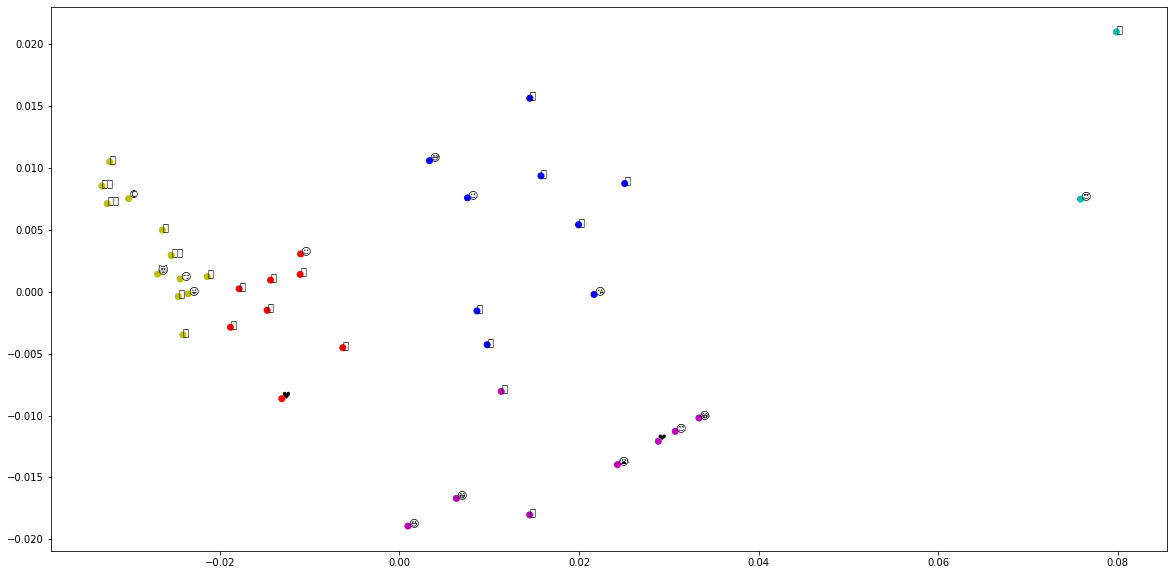

In [4]:
colors = ["r", "b", "c", "y", "m" ]
kmeans = KMeans(n_clusters = len(colors), init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(descriptions)


pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(descriptions)


x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(emojis):
    ax.annotate(txt, (x_axis[i], y_axis[i]))